# Programma 1

### Le dipendenze dei due notebook sono specificate in _requirements.txt_, le librerie possono essere installate direttamente tramite pip e il file dei requisiti: _"pip install -r requirements.txt"_

## Annotazione Linguistica
Definita la funzione _open_file_ per accedere ai corpus, ho inserito nella funzione annota tutte le operazioni di annotazione linguistica, in seguito definito la classe _"Annotated"_ per poter restituire nella funzione annota un oggetto con chiavi il nome delle annotazioni ritornate e come valore gli array contenenti le annotazioni. L'attributo _tokenized_sentences_ contiene la divisione del corpus in frasi ma queste sono tokenizzate, pulite della punteggiatura e memorizzate ciascuna in un array mentre l'attributo tokens contiene i token senza punteggiatura, "pulizia" effettuata già all'interno di _annota_. La funzione _change_treebank_ mi permette di convertire la Part of Speech assegnata dal **Penn Treebank PoS** nel **WordNet PoS** per poter eseguire poi la lemmatizzazione con _WordNetLemmatizer_.

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string

class Annotated:
    def __init__(self , sentences, tokenized_sentences, tokens, pos, lemmi):
        self.sentences = sentences
        self.tokenized_sentences = tokenized_sentences
        self.tokens = tokens
        self.pos = pos
        self.lemmi = lemmi

def open_file(path):

    with open(path, "r", encoding = 'utf-8') as infile:
        content = infile.read()
    return content

def change_treebank(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN

def annota(testo):

    frasi_intere = nltk.tokenize.sent_tokenize(testo)
    frasi = []
    all_tokens = []
    all_pos_tagged = []
    lemmi = []
    lemmatizer = WordNetLemmatizer()

    for frase in frasi_intere:
        tokens = nltk.tokenize.word_tokenize(frase)
        no_punc_tokens = [i for i in tokens if (i not in string.punctuation) and (i != "’" and i != '”' and i != '“')]
        frasi.append(no_punc_tokens)
        all_tokens.extend(no_punc_tokens)
    
    

    all_pos_tagged = nltk.tag.pos_tag(all_tokens)
    lemmi = [lemmatizer.lemmatize(word, change_treebank(pos)) for word, pos in all_pos_tagged]

    result = Annotated(frasi_intere, frasi, all_tokens, all_pos_tagged, lemmi)
    return result


corpus1 = annota(open_file('Corpus Letterario 1.txt'))
corpus2 = annota(open_file('Corpus articolo 2.txt'))

## Confronto per frasi e numero di token dei due corpus
Avendo già in corpus1 e corpus2 tutti i valori di cui necessito il confronto viene eseguito secondo delle clausole _if_ che confrontano la lunghezza del array _sentences_ e del array _tokens_ per entrambi i corpus. Le funzioni restituiscono una stringa che definisce quale corpus ha un maggior numero di frasi e di token ritornando i valori.

In [2]:
def confronto_frasi(a, b):

    if(len(a.sentences) > len(b.sentences)):

        return f'Il corpus numero 1 ha un numero maggiore di frasi (${len(a.sentences)} frasi) rispetto al corpus numero 2 (${len(b.sentences)} frasi)'
    
    if(len(a.sentences) == len(b.sentences)):

        return f'Il corpus numero 1 ha lo stesso numero di frasi del corpus numero 2 (${len(b.sentences)} frasi)'
    
    else:
        return f'Il corpus numero 2 ha un numero maggiore di frasi ({len(b.sentences)} frasi) rispetto al corpus numero 1 ({len(a.sentences)} frasi)'
    
def confronto_token(a, b):

    if(len(a.tokens) > len(b.tokens)):

        return f'Il corpus numero 1 ha un numero maggiore di token (${len(a.tokens)} frasi) rispetto al corpus numero 2 (${len(b.tokens)} token)'
    
    if(len(a.tokens) == len(b.tokens)):

        return f'Il corpus numero 1 ha lo stesso numero di token del corpus numero 2 (${len(b.tokens)} token)'
    
    else:
        return f'Il corpus numero 2 ha un numero maggiore di token ({len(b.tokens)} token) rispetto al corpus numero 1 ({len(a.tokens)} token)'
    
frasi = confronto_frasi(corpus1, corpus2)

token = confronto_token(corpus1, corpus2)

print(frasi)
print(token)

Il corpus numero 2 ha un numero maggiore di frasi (468 frasi) rispetto al corpus numero 1 (391 frasi)
Il corpus numero 2 ha un numero maggiore di token (10034 token) rispetto al corpus numero 1 (6792 token)


## Lunghezza media delle frasi in token e lunghezza media dei token

Le funzioni _media_frasi_ e _media_token_ hanno alla base la stessa logica. Presi in input entrambi i corpus:
- Si creano due array che conterranno la lunghezza di ogni frase
- Due cicli _for_ calcolano e inseriscono questi valori negli array
- Si sommano tutti i valori degli array con _sum(array)_ e si calcola la media dividendo per la lunghezza dell'array
- un _if statement_, come nelle funzioni precedenti, ritorna quale corpus ha la media maggiore e entrambi i valori

In [3]:
def media_frasi(a, b):

    A = []
    B = []

    for i in a.tokenized_sentences:
        A.append(len(i))
    
    for i in b.tokenized_sentences:
        B.append(len(i))

    media_1 = round(sum(A)/len(a.sentences), 2)
    media_2 = round(sum(B)/len(b.sentences), 2)
    
    if(media_1 > media_2):
        return f'Il corpus numero 1 ha una lunghezza media delle frasi ({media_1}) maggiore rispetto al corpus numero 2 ({media_2})'
    if(media_1 == media_2):
        return f'Il corpus numero 1 e il corpus numero 2 hanno la stessa lunghezza media delle frasi ({media_1})'
    else:
        return f'Il corpus numero 2 ha una lunghezza media delle frasi ({media_2}) maggiore rispetto al corpus numero 1 ({media_1})'
    
def media_token(a, b):

    A = []
    B = []

    for i in a.tokens:
        A.append(len(i))

    for i in b.tokens:
        B.append(len(i))

    media_token1 = round(sum(A)/len(a.tokens), 2)
    media_token2 = round(sum(B)/len(b.tokens), 2)

    if(media_token1 > media_token2):
        return f'Il corpus numero 1 ha una lunghezza media dei token ({media_token1}) maggiore rispetto al corpus numero 2 ({media_token2})'
    if(media_token1 == media_token2):
        return f'Il corpus numero 1 e il corpus numero 2 hanno la stessa lunghezza media dei token ({media_token1})'
    else:
        return f'Il corpus numero 2 ha una lunghezza media dei token ({media_token2}) maggiore rispetto al corpus numero 1 ({media_token1})'

mediafrasi = media_frasi(corpus1, corpus2)
mediatoken = media_token(corpus1, corpus2)
print(mediafrasi)
print(mediatoken)

Il corpus numero 2 ha una lunghezza media delle frasi (21.44) maggiore rispetto al corpus numero 1 (17.37)
Il corpus numero 2 ha una lunghezza media dei token (5.03) maggiore rispetto al corpus numero 1 (4.36)


## Calcolo del numero di Hapax per intervalli
#### (500, 1000, 3000, totale del corpus)
La funzione _hapax_ prende in input l'oggetto ritornato da annota e il numero di token che si vuole prendere in considerazione, se il secondo parametro non viene specificato si analizza automaticamente tutto il corpus. Accedendo all'attributo _tokens_ contenente il testo tokenizzato crea il vocabolario del corpus con _list(set(**array dei token**))_. Il ciclo _for_ scorre il vocabolario e l'_if_ inserisce nell'array **hapax** solo i token con frequenza 1. Il ritorno della funzione è la lunghezza dell'array **hapax** tramite la quale si può _"plottare"_ l'andamento del numero di hapax all'aumentare dei token utilizzando la funzione precedente _plot_double_.

In [4]:
import matplotlib.pyplot as plt

def plot_double(x1, y1, x2, y2, xlabel, ylabel, title):

    x1 = x1
    y1 = y1
    y2 = y2
    x2 = x2
    plt.plot(x1, y1, label = 'Corpus 1', marker = 's')
    plt.plot(x2, y2, label = 'Corpus 2', marker = 's')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc="upper left")

    plt.show

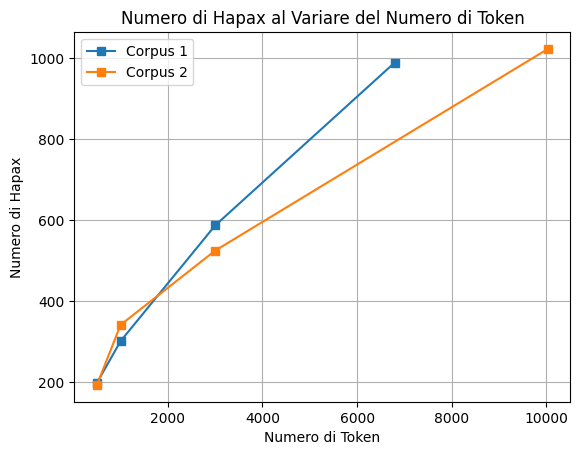

In [5]:
def hapax(corpus, max_tokens = None):

    if max_tokens is None:
        max_tokens = len(corpus.tokens)

    vocabulary = list(set(corpus.tokens[:max_tokens]))
    hapax = []

    for i in vocabulary:
        if(corpus.tokens[:max_tokens].count(i) == 1):
            hapax.append(i)
    return len(hapax)

data1 = [hapax(corpus1, 500), hapax(corpus1, 1000), hapax(corpus1, 3000), hapax(corpus1)]
data2 = [hapax(corpus2, 500), hapax(corpus2, 1000), hapax(corpus2, 3000), hapax(corpus2)]
x1 = [500, 1000, 3000, len(corpus1.tokens)]
x2 = [500, 1000, 3000, len(corpus2.tokens)]

plot_double(x1, data1, x2, data2, 'Numero di Token', 'Numero di Hapax', 'Numero di Hapax al Variare del Numero di Token')

# Vocabolario e TTR dei due Corpus
La funzione _vocab_ttr_ prende in input il corpus e per intervalli di 200 token calcola la grandezza del vocabolario e la **Type Token Ratio**. Inoltre aggiunge i valori di _i_ (la variabile del for) all'array _x_ che rappresenta l'asse delle x per il plot del confronto tra i due corpus.

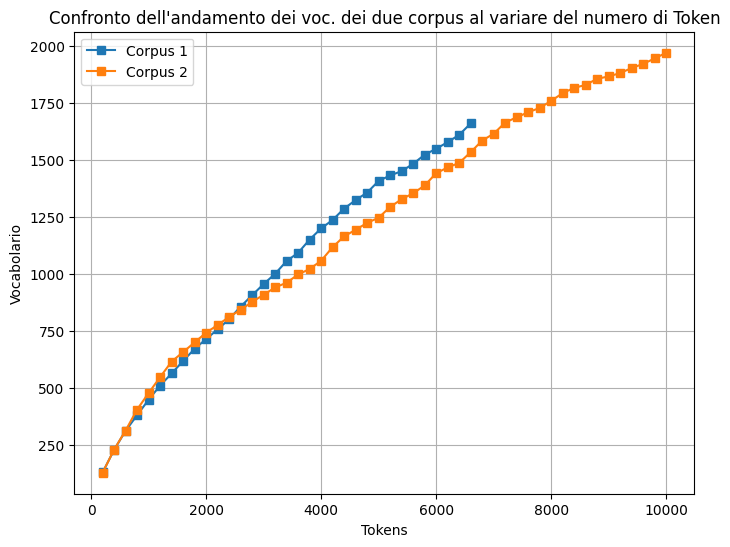

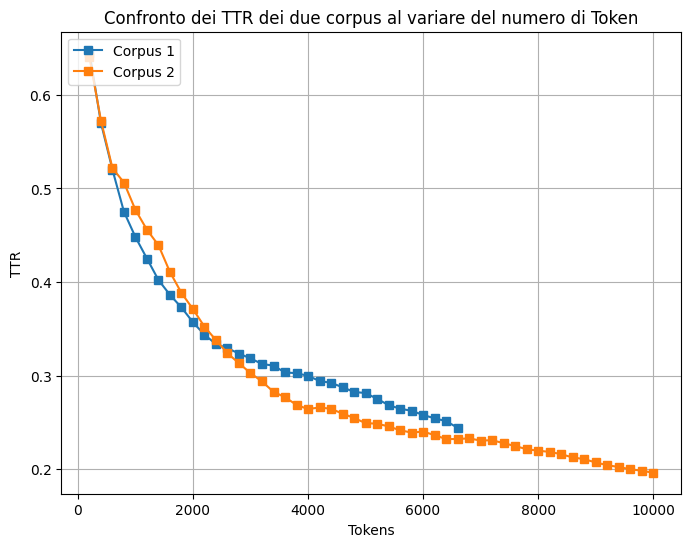

In [6]:
def vocab_ttr(a):

    i = 200
    vocabs = []
    ttrs = []
    x = []
    while(i < len(a.tokens)):
        
        if(len(a.tokens)- i < 200):
            x.append(i)
            i = i + (len(a.tokens) - i)
            vocabulary = list(set(a.tokens[:i]))
            ttr = len(vocabulary)/i
            vocabs.append(len(vocabulary))
            ttrs.append(ttr)
        else:
            x.append(i)
            vocabulary = list(set(a.tokens[:i]))
            ttr = len(vocabulary)/i
            vocabs.append(len(vocabulary))
            ttrs.append(ttr)
            i += 200
    return vocabs, ttrs, x

vocabolario_1 = vocab_ttr(corpus1)[0]
vocabolario_2 = vocab_ttr(corpus2)[0]
ttr1 = vocab_ttr(corpus1)[1]
ttr2 = vocab_ttr(corpus2)[1]
x1 = vocab_ttr(corpus1)[2]
x2 = vocab_ttr(corpus2)[2]

plt.figure(figsize=(8, 6))
plot_double(x1, vocabolario_1, x2, vocabolario_2, 'Tokens', 'Vocabolario', "Confronto dell'andamento dei voc. dei due corpus al variare del numero di Token")

plt.figure(figsize=(8, 6))
plot_double(x1, ttr1, x2, ttr2, 'Tokens', 'TTR', "Confronto dei TTR dei due corpus al variare del numero di Token")


# Lemmi
La funzione _get_vocab_lemmi_ prende in input i due oggetti contenenti le annotazioni dei due corpus ed estrae la chiave _lemmi_. Con la stessa operazione per definire il vocabolario nella funzione precedente crea il vocabolario dei lemmi ed esegue un confronto sulla lunghezza.

In [7]:
def get_vocab_lemmi(a, b):
    lemmi_a = len(list(set(a.lemmi)))
    lemmi_b = len(list(set(b.lemmi)))
    if(lemmi_a > lemmi_b):
        return f'Il corpus numero uno ha una dimensione del vocabolario dei lemmi maggiore ({lemmi_a}) del corpus numero due ({lemmi_b})'
    if(lemmi_a == lemmi_b):
        return f'I due corpus hanno la stessa dimensione del vocabolario dei lemmi: {lemmi_a}'
    else:
        return f'Il corpus numero uno ha una dimensione del vocabolario dei lemmi minore ({lemmi_a}) del corpus numero due ({lemmi_b})'

get_vocab_lemmi(corpus1, corpus2)

'Il corpus numero uno ha una dimensione del vocabolario dei lemmi minore (1450) del corpus numero due (1679)'

# Polarity Labeling
Per analizzare le frasi dei due corpus e poter confrontare la distribuzione di frasi con polarità positiva o negativa si ricorre all'addestranmento dell'algoritmo di machine learning **Multinomial Naive Bayes** con il dataset **Emotions** trovato su _Kaggle_: https://www.kaggle.com/datasets/nelgiriyewithana/emotions, _"A collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise."_

Il dataset contiene 6 etichette che identificano tre emozioni positive e tre negative, quindi ho cambiato le etichette in pos e neg per poter effettuare un analisi solo sulla polarità delle frasi. Dato che il modello ha prodotto un risultato soddisfacente nella fase di test si procede al confronto dei due corpus sulla distribuzione delle frasi positive o negative, ottenendo due array contenenti l'etichettatura di ogni frase. Per produrre un confronto tra i due corpus ho utilizzato la libreria **MatPlotLib** e creato un grafico a torta per ogni corpus.


              precision    recall  f1-score   support

         neg       0.95      0.97      0.96     45236
         pos       0.97      0.94      0.95     38126

    accuracy                           0.96     83362
   macro avg       0.96      0.95      0.96     83362
weighted avg       0.96      0.96      0.96     83362



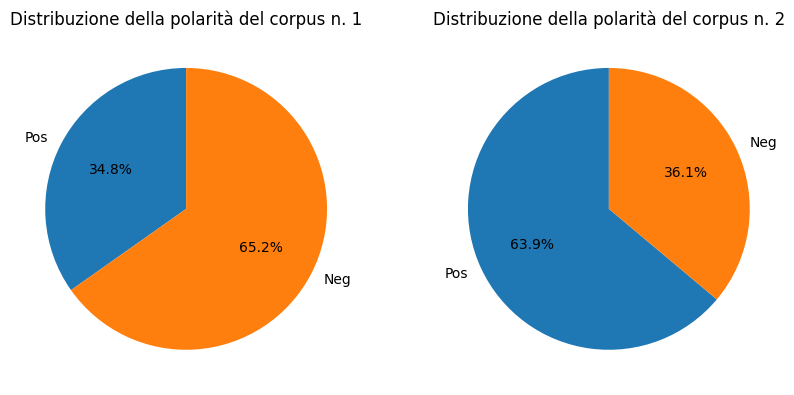

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

data = pd.read_csv('dataset.csv')
data = data.drop([data.columns[0]], axis=1)

etichette_da_sostituire = {
    1: 'pos',
    2: 'pos',
    5: 'pos',
    0: 'neg',
    3: 'neg',
    4: 'neg',
}

data['label'] = data['label'].replace(etichette_da_sostituire)

X_train, X_test, y_train, y_test = train_test_split(data.text, data.label, test_size=0.2, random_state=42, shuffle=True)

classifier = MultinomialNB()
vectorizer = TfidfVectorizer(max_features=5000)
pipeline = Pipeline([
    ('tfidfvectorizer', vectorizer),
    ('MultinomialNB', classifier)
])

trained = pipeline.fit(X_train, y_train)
y_pred = trained.predict(X_test)
print(classification_report(y_test, y_pred))

corpus1_predict = trained.predict(corpus1.sentences)
corpus2_predict = trained.predict(corpus2.sentences)

import matplotlib.pyplot as plt

positive_count_corpus1 = sum(1 for label in corpus1_predict if label == 'pos')
negative_count_corpus1 = sum(1 for label in corpus1_predict if label == 'neg')

positive_count_corpus2 = sum(1 for label in corpus2_predict if label == 'pos')
negative_count_corpus2 = sum(1 for label in corpus2_predict if label == 'neg')

labels = ['Pos', 'Neg']

sizes_corpus1 = [positive_count_corpus1, negative_count_corpus1]
sizes_corpus2 = [positive_count_corpus2, negative_count_corpus2]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(sizes_corpus1, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribuzione della polarità del corpus n. 1')
axs[1].pie(sizes_corpus2, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribuzione della polarità del corpus n. 2')

plt.show()